<a href="https://colab.research.google.com/github/HongSeongMo/Airbnb/blob/main/Copy_of_airbnb_lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5강. 매출예측 모델 학습: 선형회귀와 의사결정 나무

학습 데이터 읽기

In [2]:
import pandas as pd

In [4]:
path = 'drive/MyDrive/letuin/airbnb/data'

X_train = pd.read_csv(f'{path}/x_train.csv')
y_train = pd.read_csv(f'{path}/y_train.csv')

모델 학습

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

선형회귀모델(Linear Regression)
*   사이킷런 공식 문서 :

In [6]:
# 모델 생성
model_linear = LinearRegression() #선형회귀 모델

In [9]:
# 모델 학습
# model_linear.fit(X_train, y_train)

In [8]:
# !pip install sklearn
# from sklearn.linear_model import LinearRegression
# from sklearn.impute import SimpleImputer

# # Load your data into X_train and y_train

# # Impute missing values in x_train
# imputer = SimpleImputer(strategy="mean")
# X_train = imputer.fit_transform(X_train)

# # Create a new LinearRegression model
# model_linear = LinearRegression()

# # Fit the model to the imputed data
# model_linear.fit(X_train, y_train)

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load your data into X_train and y_train

# Impute missing values in X_train
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

# Create a new LinearRegression model
model_linear = LinearRegression()

# Fit the model to the imputed data
model_linear.fit(X_train, y_train)

LinearRegression()

의사결정나무(Decision tree regression)
*   싸이킷런 공식 문서:

In [12]:
# 모델 생성
model_tree = DecisionTreeRegressor(max_leaf_nodes=100) #의사결정나무 모델

In [14]:
# 모델 학습
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=100)

모델 성능 평가

매출 예측

In [15]:
X_train

array([[  7., 232.,  50., ...,   0.,   0.,   1.],
       [  2.,   0.,   5., ...,   0.,   0.,   1.],
       [  1.,  89.,   1., ...,   0.,   0.,   0.],
       ...,
       [  2.,  89.,   1., ...,   0.,   0.,   1.],
       [  2., 364.,   1., ...,   0.,   0.,   0.],
       [  4.,  96.,   5., ...,   0.,   1.,   0.]])

In [17]:
y_pred_linear = model_linear.predict(X_train)

y_pred_linear

array([[ 267.82497272],
       [  62.54076762],
       [ 164.21547073],
       ...,
       [-111.8888397 ],
       [ -74.39032123],
       [ 733.10124461]])

In [21]:
y_pred_linear = pd.DataFrame(y_pred_linear, columns= ["pred_linear"])

y_pred_linear

,pred_linear
0,267.824973
1,62.540768
2,164.215471
3,-77.018021
4,58.565172
...,...
61486,-138.733592
61487,-431.510341
61488,-111.888840
61489,-74.390321


In [22]:
y_pred_tree = model_tree.predict(X_train)
y_pred_tree

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
y_pred_tree = pd.DataFrame(y_pred_tree, columns= ['pred_tree'])
y_pred_tree


,pred_tree
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
61486,0.0
61487,0.0
61488,0.0
61489,0.0


In [25]:
y_train = pd.concat([y_train, y_pred_linear, y_pred_tree], axis=1)

y_train

,revenue,pred_linear,pred_tree
0,0.0,267.824973,0.0
1,0.0,62.540768,0.0
2,0.0,164.215471,0.0
3,0.0,-77.018021,0.0
4,0.0,58.565172,0.0
...,...,...,...
61486,0.0,-138.733592,0.0
61487,0.0,-431.510341,0.0
61488,0.0,-111.888840,0.0
61489,0.0,-74.390321,0.0


test 데이터 비교 : 실제 vs 예측

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15,10)

<Axes: xlabel='revenue', ylabel='pred_linear'>

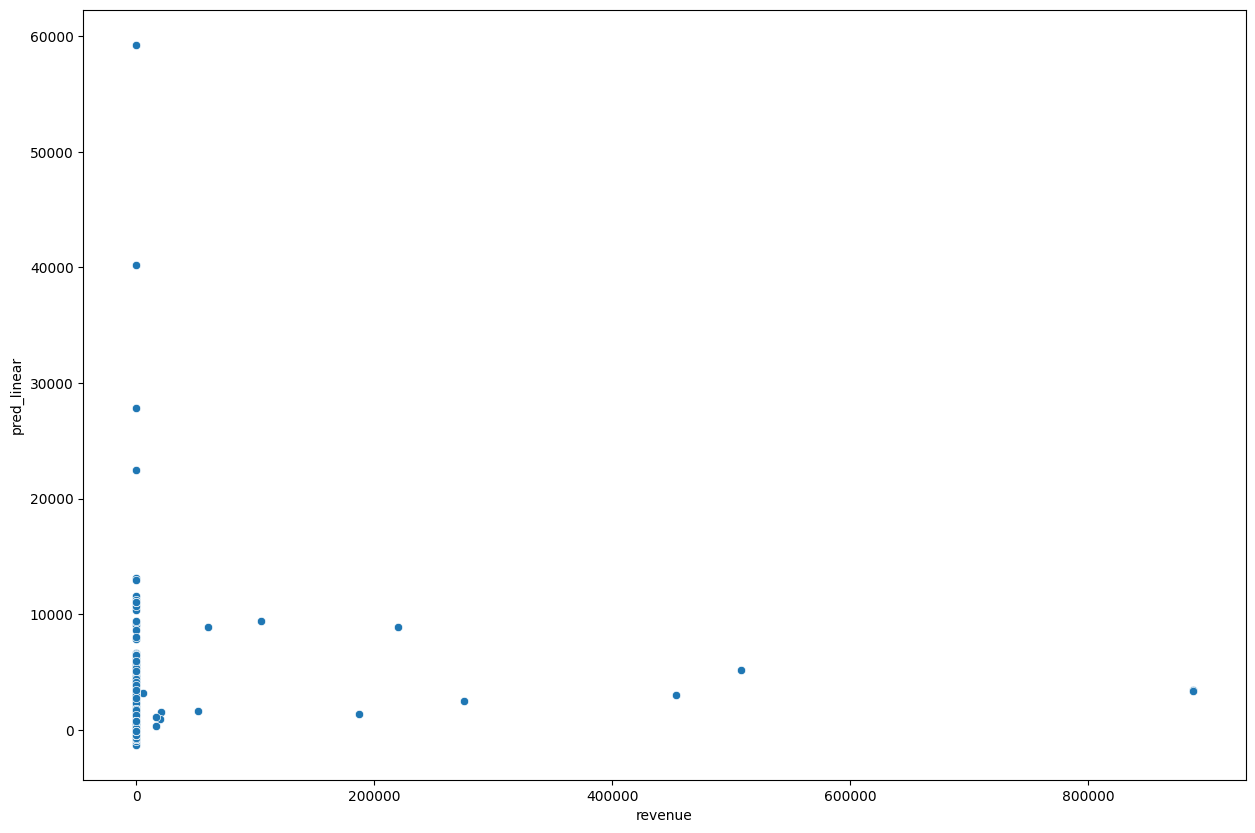

In [28]:
sns.scatterplot(data=y_train,
                x = 'revenue',
                y = 'pred_linear')

<Axes: xlabel='revenue', ylabel='pred_tree'>

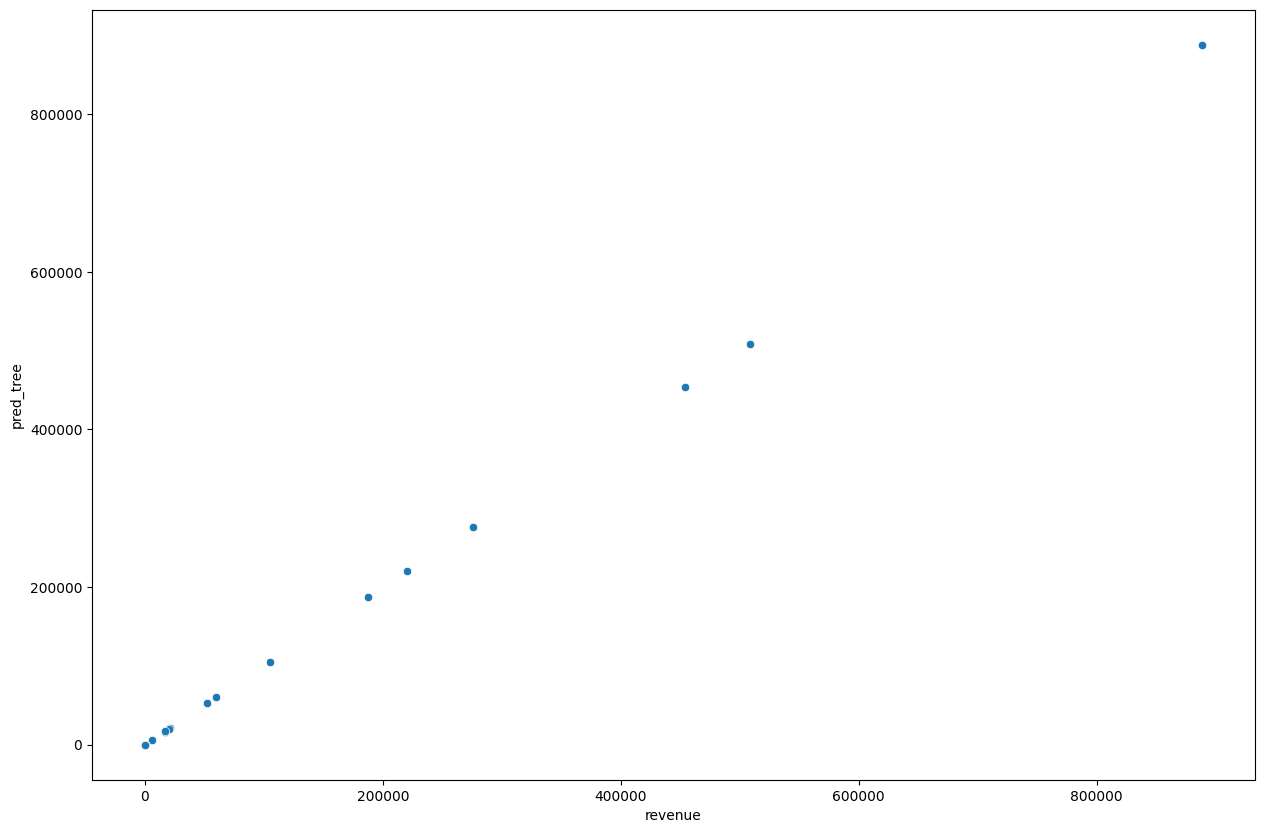

In [29]:
sns.scatterplot(data=y_train,
                x = 'revenue',
                y = 'pred_tree')

MAE(Mean Absolute Error)
*   정의 : 오차 절대값의 평균
*   단위 : 예측값의 단위와 동일(의미 해석이 직관적임)
*   의미 : 예측값이 실제값과 벗어나는 정도의 평균
*   값이 작을수록 예측이 정확. 즉, 모델의 성능이 좋음
*   예) MAE가 10,000원이면, 모델의 예측결과가 실제값으로부터 평균적으로 만원정도 벗어난다고 해석

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
mean_absolute_error(y_train.revenue, y_train.pred_linear)

248.89768143805986

In [32]:
mean_absolute_error(y_train.revenue, y_train.pred_tree)

0.0